**ETAPA 1. Descripción del Proyecto**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [675]:
# Cargar todas las librerías
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**En este sección reuní el dataframe, la función .read_csv permite leer el archivo cargado.**

In [676]:
# leer conjuntos de datos en el DataFrame
df_games=pd.read_csv('./datasets/games.csv')

**Uso las funciones info() y head() para explorar visualmente el dataframe en cuestión para analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

In [677]:
#Imprime la información general/resumida sobre el DataFrame juegos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [678]:
# Imprime una muestra de los datos para los juegos
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya con los encabezados con el fin preservar las reglas del buen estilo, luego verificar y en su caso corregir los tipos de datos de cada columna, identificar los valores ausentes y en su caso completar dichos valores, y finalmente identificar y si fuera el caso eliminar los valores duplicados.**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS**

a. Cambiar todas las columnas a minúsculas con el fin de preservar las reglas del buen estilo.

b. Calcular el número de valores ausentes.

c. Corregir errores y preparar los datos de la columna NAME que incluye: encontrar e identificar los valores ausentes y completar los nombres de juegos ausentes con 'Unknown' así como quitar los espacios no deseados y todos los signos de pausa (.,;:).

d. Corregir errores y preparar los datos de la columna PLATFORM que incluye: agrupar los nombres existentes en tipologías de forma que se cree la columna PLATFORM_GROUP con el objetivo de que la información pueda ser entendida por el usuario final.

e. Corregir errores y preparar los datos de la columna YEAR OF RELEASE que incluye: eliminar los valores ausentes ya que no hay manera de saber el año de lanzamiento, ni tampoco es correcto inventar datos para completar la información faltante. Al quitar esos valores no afecta en nada el análisis de la siguiente etapa  ya que sólo representan el 1.61% del total de los datos (16,715 registros). Una actividad más correspondiente a este apartado es convertir de tipo float a tipo int la columna.

f. Corregir errores y preparar los datos de la columna GENRE que incluye: encontrar e identificar los valores ausentes y completar los nombres de generos ausentes con 'Unknown'.

g. Corregir errores y preparar los datos de la columna USER SCORE que incluye: Sustituir 'tbd' que es una expresión tipo texto por un valor ausente númerico NaN, cabe mencionar que no debo imputar valores ausentes por la simple y sensilla razón de que son el 40.09% del total de los registros un porcentaje demasiado elevado, ni tampoco generar un promedio y colocarlo a cada uno de ellos porque alterarían por completo el score real de usuario, y hacer ese procedimiento sesgaría por completo la información y por lo tanto no generaría un análisis confiable para el usuario final que lo conlleve a una toma de decisiones exitosa. Convertir de tipo object a tipo float la columna y multiplicar por 10 los valores con el fin de estandarizar las magnitudes con el otro SCORE de la tabla, ya que no tiene sentido tener dos score que básicamente miden lo mismo en órdenes de magnitud diferentes, entonces lo que voy hacer es colocar todo en órden de 100.

h. Corregir errores y preparar los datos de la columna RATING que incluye: Cambiar los datos existentes por otros valores que den una interpretación más semántica de la información.

i. Generar  la columna TOTAL SALES que se obtiene como resultado de la suma de las ventas en todas las regiones. 

j. Revisar y eliminar duplicados.


**Tratamiento de las columnas**

In [679]:
# Muestra los nombres de las columnas
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [680]:
# Reemplazar los nombres de las columnas para ponerlos en minúsculas
new_col_names = []
for old_name in df_games.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
    
df_games.columns = new_col_names
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [681]:
# Comprobar el resultado: la lista de encabezados
df_games.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**

1. Que estén pedientes de calificación con respecto a las tres últimas columnas: critic_score, user_score y rating.
2. Que en los años anteriores no se calificaban tanto todos los videojuegos como hoy en día.
3. Que la cantidad de videojuegos que salieron durante un año sea tran grande que no se viable hacer 'review' de todos.
4. Que haya fallas en la recolección de datos, es decir, algún error en el reporte.
5. Que no todos los juegos hayan salido en todos los países.
6. Que se haya equivoco quien realizó el dataframe y tipeo mal.
7. Que no hayan sido videojuegos de interés para los críticos y que por esa razón hayan decidido no calificarlos, así como sucede en el caso de las películas. 
8. Que los datos se hayan calificado en otra estructura de datos y que al final quien se encargo de realizar el dataframe haya decidido no ingresarlos por lo tardado que sería hacer la conversión.  

**Tratamiento de los valores ausentes**

Respecto a esta disyuntiva se puede observar en la salida de abajo [8] que es el resultado de ejecutar la entrada [8] "calcular el número de valores ausentes"; que las tres columnas con el mayor número de valores ausentes son CRITIC SCORE (51.32%), USER SCORE (40.09%) y RATING (40.48%) al ser un porcentaje tan elevado no es nada recomendable imputar datos, generar un promedio y colocarlo a cada uno de ellos porque esto alterarían por completo el score real de usuario, el score real de los críticos, ni tampoco es correcto generar clasificaciones para el rating de forma aleatoriamente o simulada, y/o inventar datos por el simple hecho de tener información que no existe ya que esto sesgaría por completo los datos lo cual no permitiría generar un modelo confiable y real que representa información confiable para quien tome decisiones con respeto al proyecto solicitado. Es mejor por ética profesional y honestidad trabajar solo con los datos reales que si representa información auténtica y que servirán para generar el modelo solicitado, cualquier otro modo de proceder sería una tontería de quien se atreva a hacerlo.  

In [682]:
# Calcular el número de valores ausentes
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Preparar los datos de la columna NAME**

In [683]:
# Encuentra los valores ausentes en la columna 'name'
df_games['name'].value_counts(dropna=False).sort_index()

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
NaN                             2
Name: count, Length: 11560, dtype: int64

In [684]:
# Identificar los valores ausentes
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [685]:
# Completa los nombres de juegos ausentes con 'Unknown'
df_games.fillna({'name': 'Unknown'}, inplace=True)

In [686]:
# Quitar los espacios no deseados
df_games['name']=df_games['name'].str.strip()

In [687]:
# Quitar todos los signos de pausa
df_games['name']=df_games['name'].str.replace('.','').str.replace(',','').str.replace(';','').str.replace(':','')

**Preparar los datos de la columna PLATFORM**

In [688]:
# Agrupar por plataforma
def agrupar_plataforma(fila):
    if fila in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return 'Nintendo'
    elif fila in ['PC','PCFX']:
        return 'PC'
    elif fila in ['PS','PS2','PS3','PS4','PSP','PSV']:
        return 'PlayStation'
    elif fila in ['X360','XB','XOne']:
        return 'XBox'
    else:
        return 'Other'

In [689]:
# Crear la columna PLATFORM GROUP para calcular el tiempo transcurrido desde la primera visita
df_games['platform_group'] = df_games['platform'].apply(agrupar_plataforma)

In [690]:
# Imprimir una muestra de los datos
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,Super Mario Bros,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo
6,New Super Mario Bros,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Nintendo
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Nintendo
8,New Super Mario Bros Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo


In [691]:
# Mostrar cuántos juegos hay por plataforma
df_games['platform_group'].value_counts()

platform_group
PlayStation    6720
Nintendo       6270
XBox           2333
PC              975
Other           417
Name: count, dtype: int64

**Preparar los datos de la columna YEAR OF RELEASE**

In [692]:
# Eliminar los valores ausentes
df_games=df_games.dropna(subset=['year_of_release'])
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


In [693]:
# Convertir de tipo float a tipo int la columna
df_games['year_of_release']=df_games['year_of_release'].astype('int')

In [694]:
# Imprimir la información general actualizada
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(5), int32(1), object(6)
memory usage: 1.6+ MB


**Preparar los datos de la columna GENRE**

In [695]:
# Identificar los valores ausentes
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
659,Unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Other
14244,Unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other


In [696]:
# Completar los nombres de genero ausentes con 'Unknown'
df_games.fillna({'genre': 'Unknown'}, inplace=True)

**Preparar los datos de la columna USER SCORE**

In [697]:
# Sustituir 'tbd' por un valor ausente númerico 'nan'
df_games.loc[df_games['user_score']=='tbd','user_score'] = np.nan

In [698]:
# Convertir de tipo object a tipo float la columna
df_games['user_score']=df_games['user_score'].astype('float')

In [699]:
# Multiplicar por 10 los valores con el fin de estandarizar las magnitudes con la columna CRITIC SCORE
df_games['user_score']=df_games['user_score']*10

**Preparar los datos de la columna RATING**

In [700]:
# Cambiar los datos existentes por otros valores que den una interpretación más semántica
def semantica_rating(fila):
    if fila == 'E' or fila == 'K-A':
        return 'Everyone'
    elif fila == 'T':
        return 'Teens'
    elif fila == 'M':
        return 'Mature'
    elif fila == 'E10+':
        return 'Everyone 10y+'
    elif fila == 'EC':
        return 'Early Childhood'
    elif fila == 'RP':
        return 'Pending'
    elif fila == 'AO':
        return 'Adults Only'
    else:
        return 'Pending'

In [701]:
# Crear la columna RATING SEMANTICS 
df_games['rating_semantics'] = df_games['rating'].apply(semantica_rating)

In [702]:
# Imprimir una muestra de los datos
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo,Everyone
1,Super Mario Bros,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo,Pending
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo,Everyone
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo,Everyone
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo,Pending
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo,Pending
6,New Super Mario Bros,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,Nintendo,Everyone
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,Nintendo,Everyone
8,New Super Mario Bros Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,Nintendo,Everyone
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo,Pending


**Calcular las ventas totales**

In [703]:
# Generar la columna TOTAL SALES
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [704]:
# Imprimir una muestra de los datos
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo,Everyone,82.54
1,Super Mario Bros,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo,Pending,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo,Everyone,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo,Everyone,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo,Pending,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo,Pending,30.26
6,New Super Mario Bros,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,Nintendo,Everyone,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,Nintendo,Everyone,28.91
8,New Super Mario Bros Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,Nintendo,Everyone,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo,Pending,28.31


**Revisar y eliminar duplicados**

In [705]:
# Identificar duplicados implícitos
df_games[df_games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
1591,Need for Speed Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,85.0,T,XBox,Teens,1.25
11715,Need for Speed Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,85.0,T,PC,Teens,0.08
14244,Unknown,GEN,1993,Unknown,0.0,0.00,0.03,0.00,NaN,NaN,NaN,Other,Pending,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,55.0,E,PlayStation,Everyone,0.01


In [706]:
# Eliminar duplicados
df_games = df_games.drop([1591, 11715, 14244, 16230]).reset_index(drop=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16442 non-null  object 
 1   platform          16442 non-null  object 
 2   year_of_release   16442 non-null  int32  
 3   genre             16442 non-null  object 
 4   na_sales          16442 non-null  float64
 5   eu_sales          16442 non-null  float64
 6   jp_sales          16442 non-null  float64
 7   other_sales       16442 non-null  float64
 8   critic_score      7980 non-null   float64
 9   user_score        7460 non-null   float64
 10  rating            9765 non-null   object 
 11  platform_group    16442 non-null  object 
 12  rating_semantics  16442 non-null  object 
 13  total_sales       16442 non-null  float64
dtypes: float64(7), int32(1), object(6)
memory usage: 1.7+ MB


**ETAPA 3. Análisis exploratorio**

**Responder a las preguntas del negocio**

# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

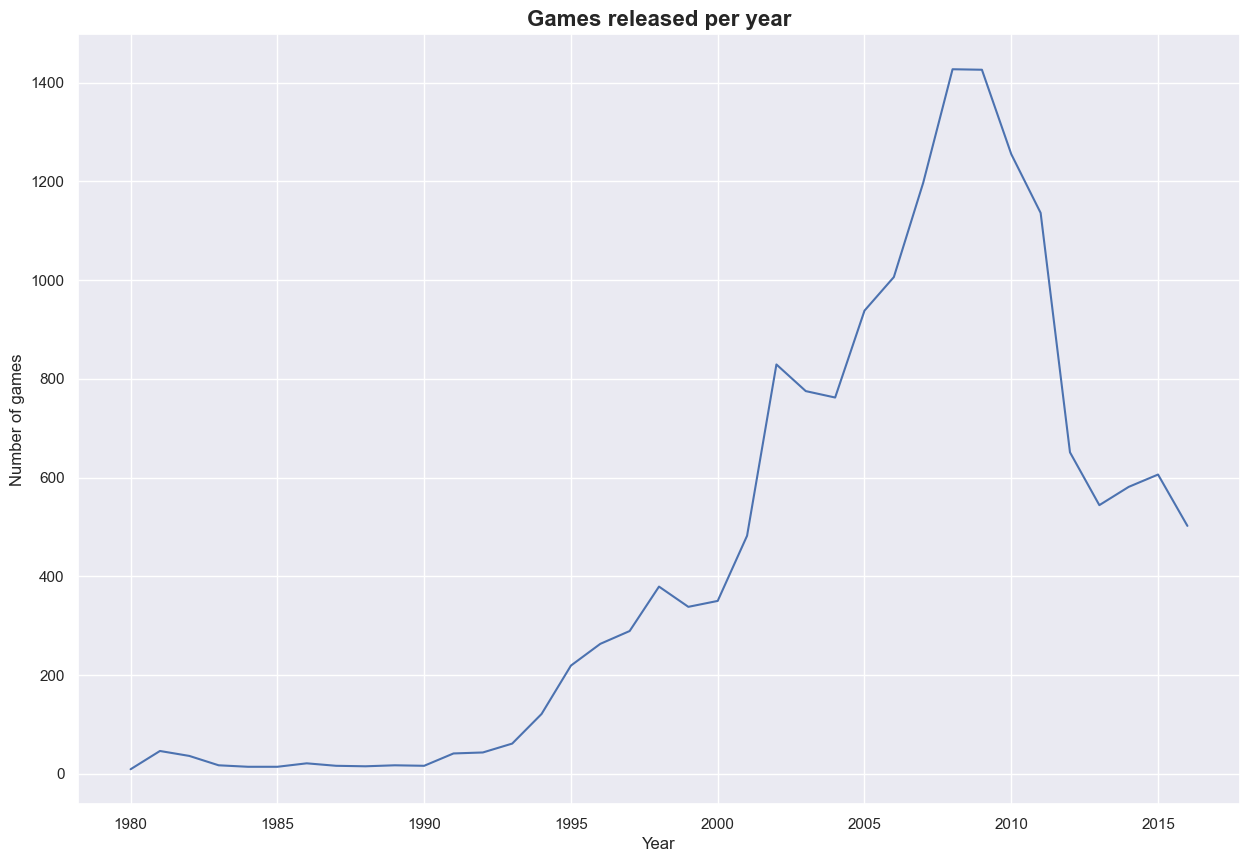

In [707]:
# Generar una gráfica de líneas para mostrar la distribución de los juegos a lo largo del tiempo 
games_per_year = df_games['year_of_release'].value_counts().sort_index().plot(
    kind='line'
)

plt.title('Games released per year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of games', fontsize=12)

plt.show()

En el gráfico de líneas se puede observar que el lanzamiento de videojuegos alcanzó un boom entre el año 2008 y 2009 pero que sufrió una abrumadora caída en ventas a consecuencia de la crisis financiera, también conocida como la Gran Recesión, que fue una crisis económica mundial que se originó en los Estados Unidos y esta fue causada por la crisis de las hipotecas que se originó cuando los deudores con alto riesgo crediticio no pudieron pagar sus créditos hipotecarios; no sólo la industria de los videojuegos se vío afectada por este suceso sino muchos áreas de consumo y realmente fueron pocos los sectores que no se vieron afectados, al haber poca demanda disminuyó la producción de videojuegos y con ello una caída considerable en la industria. Además se visualiza que a partir del año 2000 la revolución tecnológica en la industria motivo a que se generará un boom, se puede ver también que el crecimiento en este sector comienza a darse a partir del año 1995.

# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [708]:
# Crear una pivot table con las ventas totales por año y plataforma
sales_fer_platform = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

In [709]:
# Imprimir los datos
sales_fer_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


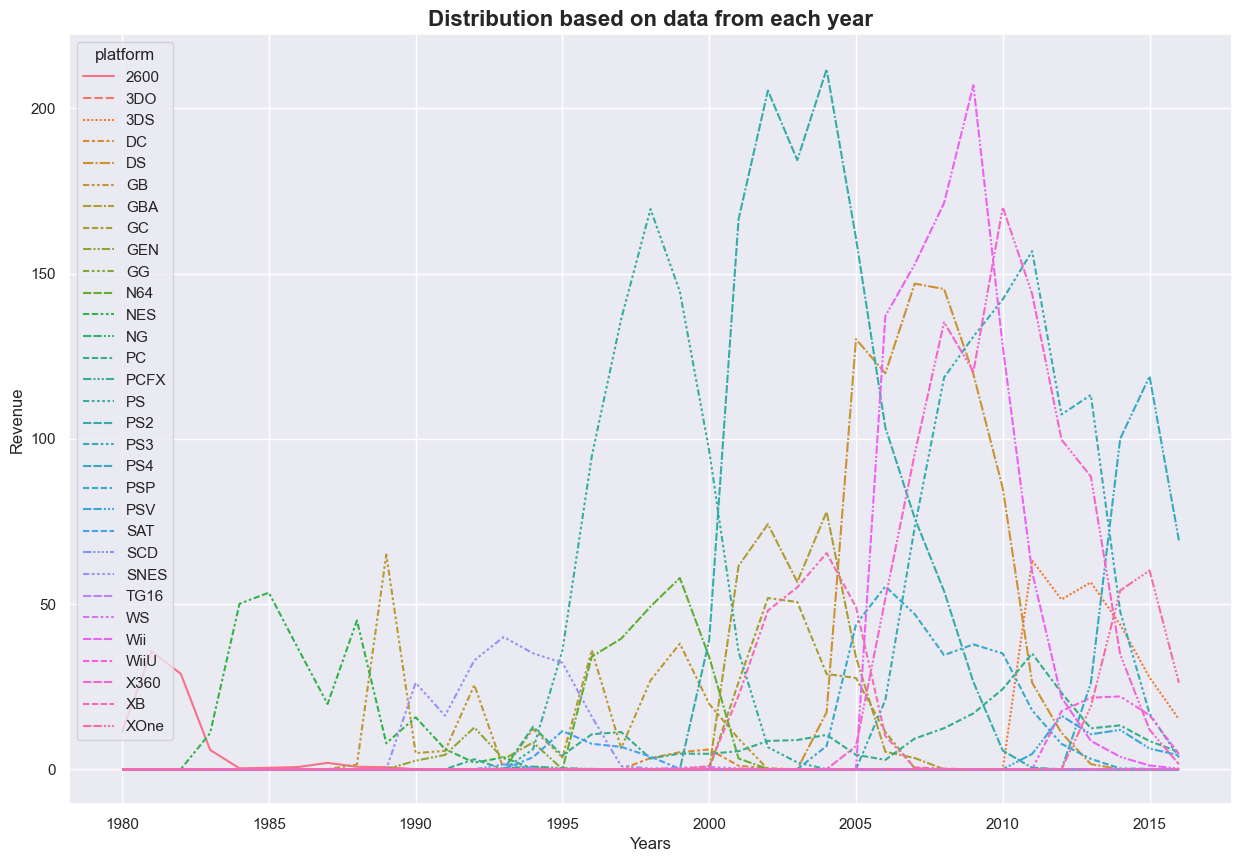

In [710]:
# Graficar los datos con la librería Seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=sales_fer_platform)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Distribution based on data from each year", fontsize=16, weight='bold')
plt.show()

En el análisis de este gráfico se puede ver que el mercado estaba dominado por tres grandes grupos: Sony, Nintendo y Microsoft. Se ve claramente que en ese momento la plataforma líder en cuanto a ventas era PlayStation con sus consolas PSP, PS, PS2, PS3, Y PS4 además visualizó que tal vez no vendía cantidad sino lo que repercutia para que se mantuviera como el número uno en ventas era el precio tan elevado de sus videojuegos; Seguido en un segundo lugar en ventas por la plataforma Nintendo con sus consolas Wii, DS, GBA, PC, 3DS, GB, NES y N64, ellos si vendían gran cantidad de videojuegos pero era mucho menor su precio en comparación con PlayStation; ya en un tercer lugar en ventas se estaba en ese momento la plataforma Xbox con sus consolas X360, XB como las más populares y las más vendidas en ese entonces, y eso provoco que la empresa Microsoft se mantuviera en esa industria dentro del top 3 dentro de las empresas con las ventas más altas en los videojuegos. Finalmente para concluir comentar que para ese entonces los videojuegos en sus plataformas para computadora comenzaban y eran pequeñas sus ventas y en el caso de otras plataformas poco comerciales no tan populares entre los clientes empezaban a ser conocidas en el mercado y por tal razón eran escasas sus ventas muchas veces ya no tenían ventas a lo largo de los años; por lo regular la vida útil de una plataforma de videojuegos depende de muchos factores como lo son: innovación tecnológica, competencia, bases de datos de los usuarios, y catálogos de videojuegos, siendo las consolas de las empresas líderes en el mercado ya mencionadas las que tardaban de 5 a 7 años en lanzar una nueva generación de consolas.

# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Dado que las plataformas que surgieron en los años 80s, 90s, 00s y 10s no se mantuvieron constantes y en crecimiento en cuanto a las ventas y en el caso particular de las primeras consolas que salieron al mercado entre los años de 1980 a 1995 estas vendían muy poco y a lo largo del periodo de tiempo hasta el año 2016 ya no tuvieron ventas consideró que no aportan datos relevantes al análisis que permitan la construcción del modelo para 2017. Para evidar distorsiones y tener un  modelo efectivo para la toma de decisiones y preciso en cuanto a la calidad de los datos que generará este, decidí considerar nada más para el armado del prototipo sólo datos correspondientes al periodo del año 2013 al 2016 ya que las ventas son constantes entre las plataformas, y siempre están generando información útil y relevante. 

# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [711]:
# Filtrar los años relevantes para trabajar solo con ellos / Ignorar los datos de años anteriores considerados como irrelevantes
df_games.query('year_of_release >=2013', inplace=True)

In [712]:
# Imprimir una muestra de los datos
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,PlayStation,Mature,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,XBox,Mature,16.27
31,Call of Duty Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,PlayStation,Pending,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,Nintendo,Pending,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,PlayStation,Mature,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16430,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation,Pending,0.01
16434,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation,Pending,0.01
16437,Samurai Warriors Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation,Pending,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation,Pending,0.01


# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Como ya se muestra en el diagrama de líneas se puede apreciar que las tres plataformas líderes en ventas fueron PlayStation con las consolas PS4 y PS3, seguida de Xbox con la consola XOne y Nintendo con la consola 3DS, entre los años 2014 y 2015 las consolas PS4 y XOne crecieron significativamente para luego tener una caída ambas en el 2016 pero aún así se mantuvieron como las plataformas líderes en ventas del año 2013 al año 2016 junto con PS3 y 3DS; las plataformas que reducen sus ventas conforme fueron pasando los años consideraros para este análisis tomando el año 2013 con su mayor volumen de ventas fueron la consola PS3 de la plataforma PlayStation, la consola 3DS de la plataforma Nintendo y la consola X360 de la plataforma XBox, y considero también a la consola WiiU de la plataforma Nintendo; las plataformas más rentables fueron PlayStation con sus consolas PS4 y PS3, Xbox con sus consolas XOne y X360 y finalmente Nintendo con sus consolas 3DS y WiiU. Las plataformas que no consideré dentro de este análisis fue por su muy bajo desempeño durante este periodo de tiempo. 

In [713]:
# Crear una pivot table de las ventas anuales por plataforma
df_life_time = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

In [714]:
# Imprimir los datos
df_life_time

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


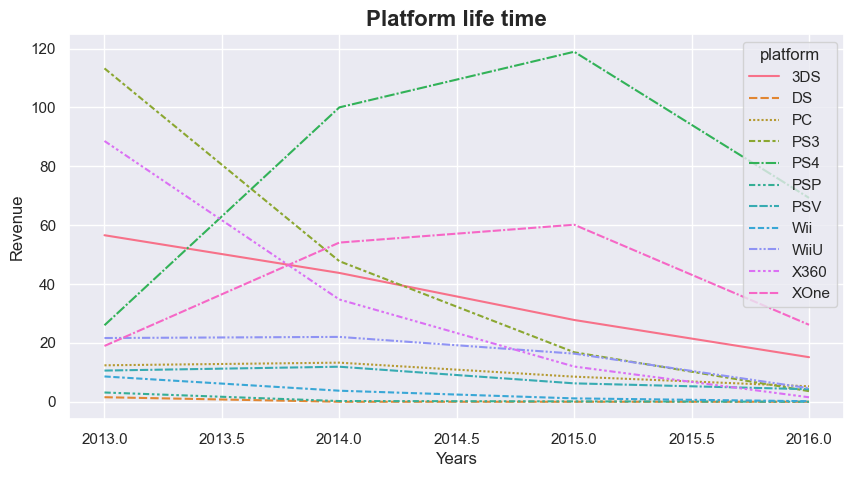

In [715]:
# Graficar los datos con la librería Seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=df_life_time)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Platform life time", fontsize=16, weight='bold')
plt.show()

# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Como se puede ver en el diagrama de caja la plataforma PlayStation es quien lidera las ventas con sus consolas PS4 y PS3 con una diferencia significativa con respecto a su más cercano competidor que es Xbox con sus consolas XOne y X360 seguido de la plataforma Nintenido con su consola 3DS donde además se puede ver que es muy extrecha la diferencia de ventas entre esta y las pertenecientes a Xbox ya comentadas;  el resto de las plataformas que se muestran en la gráfica son poco o nada representantivas en cuanto a sus ventas ya que hay una diferencia significativa con respecto a las principales plataformas entre las menos rentables se encuentra Wii U de Nintendo, PC (videojuegos de computadora), PSV y PSP pertenecientes ambas consolas a la familia PlayStation, y finalmente DS de Nintendo. Con respecto a las ventas promedio de las diferentes plataformas se puede apreciar que nunca estuvieron en el nivel medio sino que siempre estuvieron en constante movimiento respecto de su nivel de ventas porque en varios de los casos el mayor porcentaje de ventas se dio entre el 1er y 2do cuartil, en algunos otros casos el mayor porcentaje de ventas estuvo entre el segundo y tercer cuartil y sólo en tres plataformas se mantuvo en un nivel promedio (3DS, PSV, y XOne) y en el caso de las consolas DS de Nintendo y PSP de PlayStation no son nada representativos sus datos con respectivo a el nivel de ventas. 

In [716]:
# Crear una pivot table de las ventas globales desglosadas por plataforma
df_global_sales = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

In [717]:
# Imprimir los datos
df_global_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


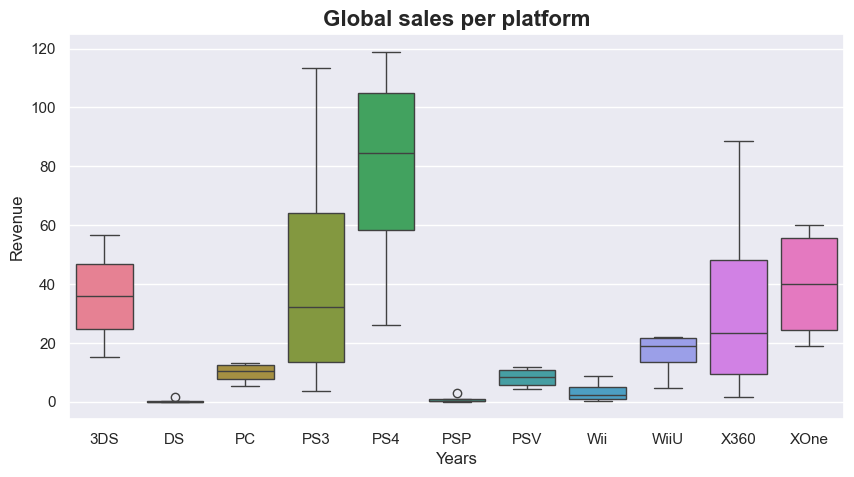

In [718]:
# Graficar los datos con la librería Seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data=df_global_sales)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Global sales per platform", fontsize=16, weight='bold')
plt.show()

# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Evaluando el resultado obtenido **0.406567902061781** de la correlacón entre las reseñas de los críticos y las ventas, y que se muestra abajo mediante un gráfica de dispersión; concluyó que el valor positivo obtenido, indica una correlación positiva, que indica que las variables tienden a aumenter al mismo tiempo. Es decir, mientras más altas sean las calificaciones de los críticos tienden a aumentar las ventas de videojuegos. 

In [719]:
# Calcular la correlación entre las reseñas de los CRÍTICOS y las ventas
df_critic_score_sales = df_games[df_games['platform']=='PS4'][['total_sales', 'critic_score']]
df_critic_score_sales['total_sales'].corr(df_critic_score_sales['critic_score'])

0.406567902061781

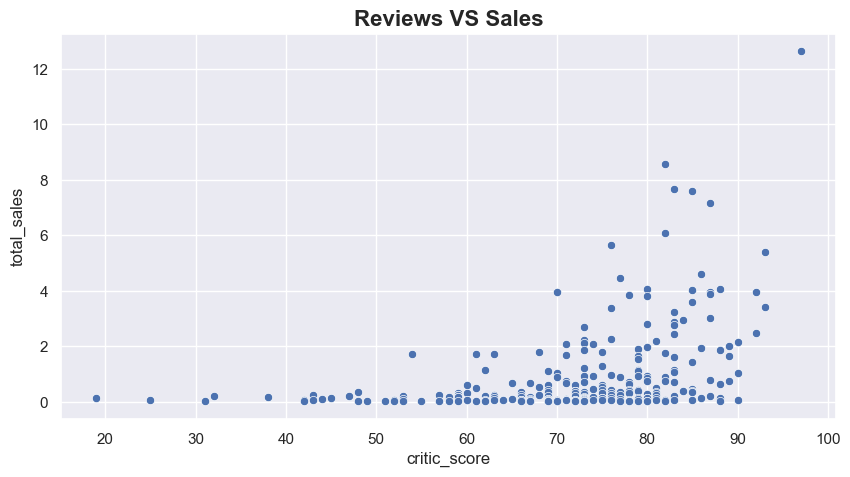

In [720]:
# Crear un gráfico de dispersión
sns.scatterplot(data=df_critic_score_sales, x="critic_score", y="total_sales").set_title("Reviews VS Sales", fontsize=16, weight='bold')
plt.show()

Evaluando el resultado obtenido **-0.031957110204556445** de la correlacón entre las reseñas de los usuarios y las ventas, y que se muestra abajo mediante un gráfica de dispersión; concluyó que el valor negativo obtenido, indica una correlación negativa, donde las variables tienden a disminuir al mismo tiempo. Es decir, mientras más bajas sean las calificaciones de los usuarios tienden a disminuir las ventas de videojuegos. 

In [721]:
# Calcular la correlación entre las reseñas de los USUARIOS y las ventas
df_user_score_sales = df_games[df_games['platform']=='PS4'][['total_sales', 'user_score']]
df_user_score_sales['total_sales'].corr(df_user_score_sales['user_score'])

-0.03195711020455641

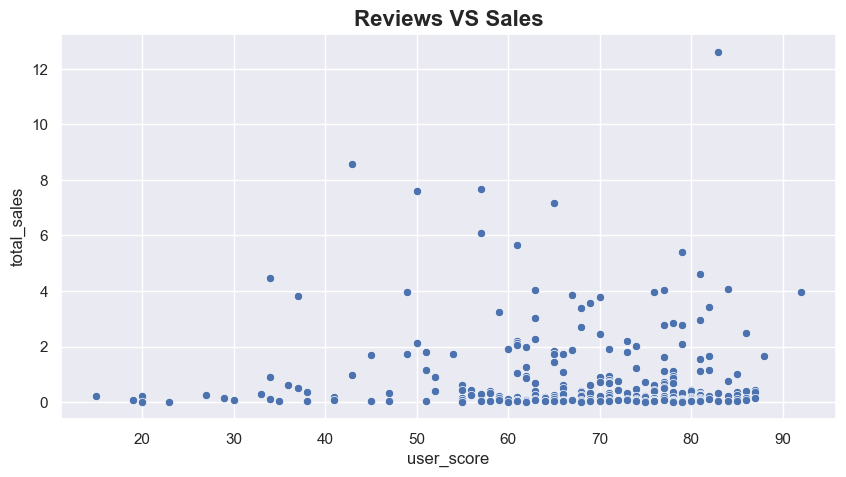

In [722]:
# Crear un gráfico de dispersión
sns.scatterplot(data=df_user_score_sales, x="user_score", y="total_sales").set_title("Reviews VS Sales", fontsize=16, weight='bold')
plt.show()

# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

El desarrollo de esta parte de análisis muestra como se mueven las ventas de los mismos videojuegos en otras plataformas se puede ver en la gráfica de barras diseñada que la consola PS3 de PlayStation lídera las ventas en comparación con otras plataformas que venden los mismos juegos, seguida en un segundo lugar por la consola X360 de XBox y luego en un tercer lugar por la consola PS4 de PlayStation puede comentar que se puede ver que hay un variación considerable de la cantidad de los mismos juegos que venden entre una y otra plataforma salvo en el caso de las consolas PSV de PlayStation y 3DS de Nintendo que tiene una competencia cerrada en la comparativa que se muestra mediante en el diagrama de barras; cabe mencionar que a pesar de que son varios los juegos que se venden en diversas plataformas este rubro tan solo representa una pequeña parte del total general de las ventas por plataforma.    

In [723]:
# Filtrar los juegos que se lanzaron en más de una plataforma
df_other_platforms = df_games.groupby(['total_sales', 'name']).filter(lambda fila:len(fila)>=2)

# Imprimir una muestra de los datos
df_other_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
2897,Minecraft Story Mode,PS4,2015,Adventure,0.25,0.33,0.00,0.11,NaN,NaN,NaN,PlayStation,Pending,0.69
2905,Minecraft Story Mode,PS3,2015,Adventure,0.27,0.31,0.00,0.11,NaN,NaN,NaN,PlayStation,Pending,0.69
3634,NHL 14,PS3,2013,Sports,0.28,0.17,0.00,0.09,80.0,60.0,E10+,PlayStation,Everyone 10y+,0.54
3682,NHL 14,X360,2013,Sports,0.40,0.09,0.00,0.05,81.0,59.0,E10+,XBox,Everyone 10y+,0.54
3696,LEGO Dimensions,WiiU,2015,Action,0.30,0.18,0.00,0.05,62.0,65.0,E10+,Nintendo,Everyone 10y+,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16246,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,14.0,E,PC,Everyone,0.01
16260,Rugby League Live 3,XOne,2015,Action,0.00,0.01,0.00,0.00,NaN,71.0,E,XBox,Everyone,0.01
16322,Rabbids Invasion The Interactive TV Show,XOne,2014,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN,XBox,Pending,0.01
16418,Dynasty Warriors Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation,Pending,0.01


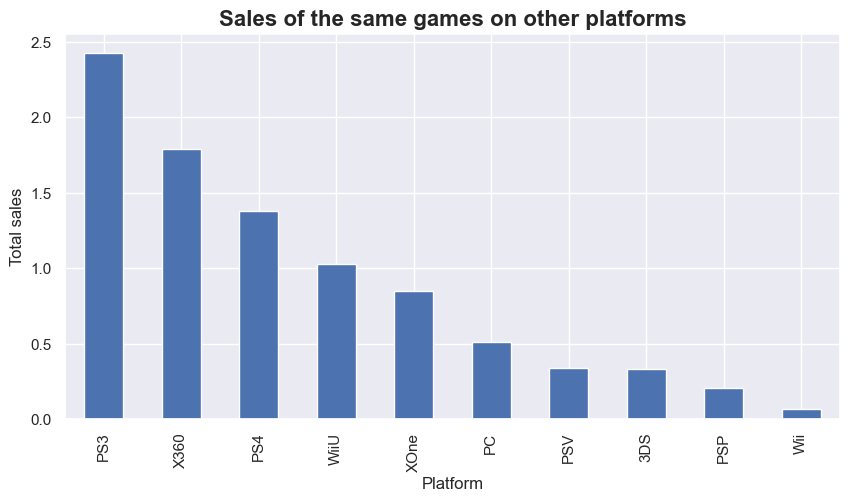

In [724]:
# Generar una gráfica de barras para mostrar las ventas de los mismos juegos en otras plafaformas
df_other_platforms.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar'
)
    
plt.title('Sales of the same games on other platforms', fontsize=16, weight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total sales', fontsize=12)

plt.show()

# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

En este apartado del proyecto se puede ver mediante el diagrama de líneas que los cuatro generos líderes en ventas durante el primer año de referencia fueron fueron 'Action', seguido en segunda posición por 'shooter', en un tercer sitio 'Role-Playing', y un cuarto peldaño por 'Sports', mientras que las ventas por genero más bajas es el primer año de referencia fueron 'Misc', 'Platform' 'Racing', 'Simulation', 'Fighting', 'Strategy', 'Adventure' y 'Puzzle' en ese orden respectivamente. Cabe destacar que conforme fueron pasando de un año a otro las ventas fueron disminuyendo de manera general en todos los generos salvo en los siguientes casos 'Shooter', 'Role-Playing', 'Sports', 'Racing', 'Fighting' y 'Puzzle' en ese orden respectivamente que tuvieron un ligero crecimiento en su segundo año de referencia con relación al primer año de referencia; ya para el tercer año de referencia siguieron las caídas respecto a las ventas en los diferentes generos salvo en los siguientes casos 'Shooter', 'Adventure', 'Simulation',  y 'Strategy' en ese orden respectivamente que tuvieron un ligero crecimiento en su tercer año de referencia con relación al segundo año de referencia; se puede visualizar además que ya para el cuarto y último año de referencia todos los generos tuvieron una tendencia negativa a la baja respecto a sus ventas. Para concluir puedo mencionar que los generos más rentables durante todo el ciclo tomado como referencia fueron 'Action', 'Shooter', 'Sports', y 'Role-Playing', es importante comentar que en ese entonces y actualmente no tienen los mismos hábitos de consumo los usuarios de Japón, respecto a los usuarios de Norteamerica y en relación con los usuarios de Europa por una simple y sencilla razón son culturas con una idiosincrasia totalmente diferente.    

In [725]:
# Crear una pivot table de las ventas anuales por género
df_distribution_per_genre = df_games.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').fillna(0)

In [726]:
# Imprimir los datos
df_distribution_per_genre

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


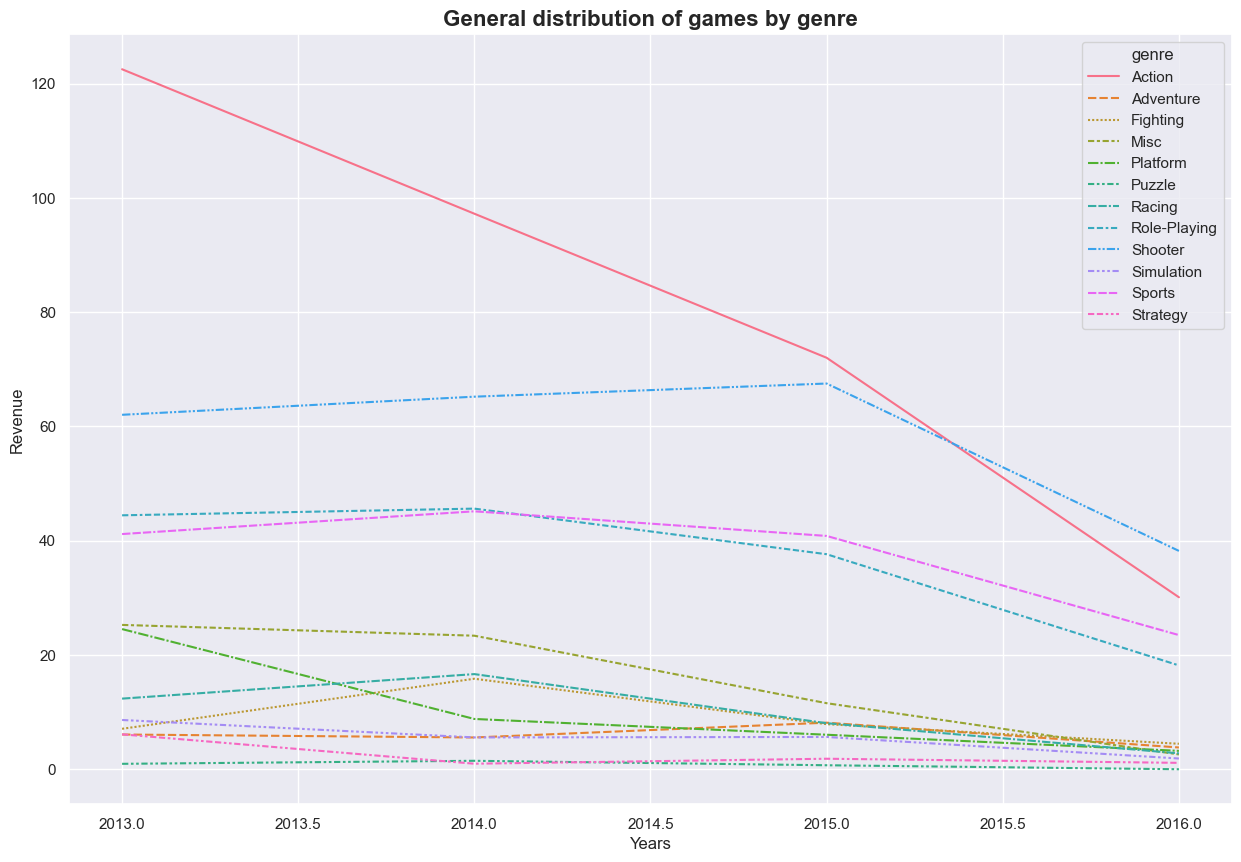

In [727]:
# Graficar los datos con la librería Seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=df_distribution_per_genre)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("General distribution of games by genre", fontsize=16, weight='bold')
plt.show()

**ETAPA 4. Crea un perfil de usuario para cada región**

Para cada región (NA, UE, JP) determina:

    a. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
    b. Los cinco géneros principales. Explica la diferencia.
    c. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

**a. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.**

Las plataformas que aparecen en el top 5 en cada una de las regiones caso de análisis van a tener cambios significativos de una región a otra respecto a la posición que ocupan en ventas por diversas circunstancias entre las que destacan: las preferencias de los consumidores, la capacidad de compra, variaciones en el precio de las consolas de una región a otra, el número de potenciales clientes con respeto al tamaño del territorio de cada región, la popularidad de las marcas respecto a la región y finalmente la capacidad de distribución dentro del territorio de cada región.  

In [728]:
# Agrupar por plataforma para obtener las cinco con más ventas en la región Norteamérica
df_platform_na_region = df_games.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head(5)

# Imprimir el top cinco
df_platform_na_region

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [729]:
# Agrupar por plataforma para obtener las cinco con más ventas en la región Europa
df_platform_eu_region = df_games.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head(5)

# Imprimir el top cinco
df_platform_eu_region

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [730]:
# Agrupar por plataforma para obtener las cinco con más ventas en la región Japón 
df_platform_jp_region = df_games.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head(5)

# Imprimir el top cinco
df_platform_jp_region

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


**b. Los cinco géneros principales. Explica la diferencia.**

Los generos que aparecen en el top 5 en cada una de las regiones caso de análisis van a tener cambios significativos de una región a otra respecto a la posición que ocupan en ventas por diversas circunstancias entre las que destacan: los gustos de los consumidores, su estilo de vida, el entorno donde viven, su idiosincrasia y cultura, el canal de distribución por el que lo adquieren (local físico o comercio electrónico) y finalmente la edad es otra variable que afecta el comportamiento de las ventas por genero en cada una de las regiones.  

In [731]:
# Agrupar por género para obtener los cinco con más ventas en la región Norteamérica
df_genre_na_region = df_games.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head(5)

# Imprimir el top cinco
df_genre_na_region

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [732]:
# Agrupar por género para obtener los cinco con más ventas en la región Europa
df_genre_eu_region = df_games.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head(5)

# Imprimir el top cinco
df_genre_eu_region

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [733]:
# Agrupar por género para obtener los cinco con más ventas en la región Japón
df_genre_jp_region = df_games.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head(5)

# Imprimir el top cinco
df_genre_jp_region

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


**c. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

Con respeto a este apartado no es el mismo criterio que usan los expertos para clasificar software de entretenimiento en la región Norteamérica, que en la región Europa o en la región Japón aquí influyen factores sociodemográficos y hasta la propio forma de pensar de  quien es responsable de realizar la clasificación, pero desde mi particular punto de vista esta clasificación para nada influye en el comportamiento de las ventas en cada región respecto de su rating.  

In [734]:
# Agrupar por clasificación para obtener las ventas totales en la región Norteamérica 
df_sorting_na_region = df_games.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)

# Imprimir los datos
df_sorting_na_region

,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


In [735]:
# Agrupar por clasificación para obtener las ventas totales en la región Europa
df_sorting_eu_region = df_games.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)

# Imprimir los datos
df_sorting_eu_region

,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


In [736]:
# Agrupar por clasificación para obtener las ventas totales en la región Japón
df_sorting_jp_region = df_games.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)

# Imprimir los datos
df_sorting_jp_region

,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


**ETAPA 5. Prueba las siguientes hipótesis**

**Primera hipótesis:** *Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.*

In [737]:
# Filtrar los datos de la plataforma Xbox One para las pruebas 
sample_1 = df_games.query('user_score >0 & platform == "XOne"') 

# Imprimir una muestra de los datos
sample_1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,XBox,Mature,5.47
179,Call of Duty Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,XBox,Mature,5.26
241,Halo 5 Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,64.0,T,XBox,Teens,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,62.0,M,XBox,Mature,4.22
372,Assassin's Creed Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,41.0,M,XBox,Mature,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,68.0,T,XBox,Teens,0.01
16324,Saints Row Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,60.0,M,XBox,Mature,0.01
16357,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,82.0,E,XBox,Everyone,0.01
16370,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,66.0,E,XBox,Everyone,0.01


In [738]:
# Filtrar los datos de la plataforma PC para las pruebas 
sample_2 = df_games.query('user_score >0 & platform == "PC"') 

# Imprimir una muestra de los datos
sample_2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,39.0,T,PC,Teens,3.05
1085,StarCraft II Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,79.0,T,PC,Teens,1.67
1338,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,22.0,E10+,PC,Everyone 10y+,1.42
1424,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,60.0,M,PC,Mature,1.36
1516,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,54.0,M,PC,Mature,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,NaN,83.0,NaN,PC,Pending,0.01
16191,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79.0,68.0,E,PC,Everyone,0.01
16237,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,79.0,E,PC,Everyone,0.01
16246,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,14.0,E,PC,Everyone,0.01


**Comprobar igualdad de varianzas con la prueba de LEVENE** 

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 = La varianza de la muestra uno no es igual a la varianza de la muestra dos.

HA = No hay evidencia suficiente para decir que las varianzas no son iguales.

En esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba de LEVENE mediante la aplicación de la función abajo desarrollada concluyó que para esta hipótesis de que la varianza de la muestra uno no es igual a la varianza de la muestra dos es falsa por lo tanto podemos rechazar la hipótesis nula. 

**Análisis 1** Prueba de LEVENE

In [739]:
alpha=0.05
hypothesis_test_levene = st.levene(sample_1['user_score'], sample_2['user_score'])
print(f'p-value: {hypothesis_test_levene.pvalue}')

p-value: 0.0038975531101303022


In [740]:
if hypothesis_test_levene.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


**Responder a preguntas de datos con la prueba T-TEST**

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

HA = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Para esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba T-TEST mediante la aplicación de la función abajo desarrollada concluyó que para esta hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas es verdadero por lo tanto no podemos rechazar la hipótesis nula.

In [741]:
alpha=0.05
hypothesis_test_one = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var=False)
print(f'p-value: {hypothesis_test_one.pvalue}')

p-value: 0.1475959401343053


In [742]:
if hypothesis_test_one.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

No podemos rechazar la hipotesis nula


**Segunda hipótesis:** *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.*

In [743]:
# Filtrar los datos del género Acción para las pruebas 
sample_3 = df_games.query('user_score >0 & genre == "Action"')

# Imprimir una muestra de los datos 
sample_3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,PlayStation,Mature,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,XBox,Mature,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,PlayStation,Mature,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,91.0,M,PlayStation,Mature,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,XBox,Mature,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16324,Saints Row Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,60.0,M,XBox,Mature,0.01
16379,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,85.0,E,Nintendo,Everyone,0.01
16381,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,51.0,E10+,XBox,Everyone 10y+,0.01
16387,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,NaN,XBox,Pending,0.01


In [744]:
# Filtrar los datos del género Acción para las pruebas 
sample_4 = df_games.query('user_score >0 & genre == "Sports"') 

# Imprimir una muestra de los datos
sample_4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_semantics,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,PlayStation,Everyone,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,PlayStation,Everyone,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,43.0,E,PlayStation,Everyone,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,57.0,E,PlayStation,Everyone,6.08
263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,45.0,E,PlayStation,Everyone,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15882,MLB 15 The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,NaN,88.0,E,PlayStation,Everyone,0.01
15886,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,69.0,E,PlayStation,Everyone,0.01
16179,Turbo Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,45.0,E,XBox,Everyone,0.01
16246,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,14.0,E,PC,Everyone,0.01


**Comprobar igualdad de varianzas con la prueba de LEVENE** 

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 = La varianza de la muestra uno no es igual a la varianza de la muestra dos.

HA = No hay evidencia suficiente para decir que las varianzas no son iguales.

En esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba de LEVENE mediante la aplicación de la función abajo desarrollada concluyó que para esta hipótesis de que la varianza de la muestra uno no es igual a la varianza de la muestra dos es falsa por lo tanto podemos rechazar la hipótesis nula. 

**Análisis 2** Prueba de LEVENE

In [745]:
alpha=0.05
hypothesis_test_levene = st.levene(sample_3['user_score'], sample_4['user_score'])
print(f'p-value: {hypothesis_test_levene.pvalue}')

p-value: 4.256668821827404e-07


In [746]:
if hypothesis_test_levene.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


**Responder a preguntas de datos con la prueba T-TEST**

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

HA = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Para esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba T-TEST mediante la aplicación de la función abajo desarrollada concluyo que para esta segunda hipótesis de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes es falsa por lo tanto podemos rechazar la hipótesis nula.

In [747]:
alpha=0.05
hypothesis_test_two = st.ttest_ind(sample_3['user_score'], sample_4['user_score'], equal_var=False)
print(f'p-value: {hypothesis_test_two.pvalue}')


p-value: 1.446003970070494e-20


In [748]:
if hypothesis_test_two.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


**ETAPA 6. Escribe una conclusión general**

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Concluyo mi análisis destacando que se ha generado un excelente proyecto, con datos ideales para construir un modelo sólido orientado al año 2017. Este modelo servirá como una herramienta valiosa para tomar decisiones por parte de los responsables del negocio, permitiéndoles alcanzar mejores resultados y asegurar el éxito. Considero que este enfoque contribuirá significativamente a obtener mayores dividendos y a mejorar el rendimiento del modelo de negocio a largo plazo.
